In [7]:
# Requirements: python=3.9+ numpy matplotlib jupyter ipython ipympl pylint ipywidgets nose
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
%matplotlib widget

import numpy as np
from utils import (State, ARAStar_Plotter, ARAStar_Planner,
                   GRAPH_LARGE, GRAPH_SMALL)
import tests

Add some intro about ARA*, how it works, what it's trying to solve, etc. Some graphics pulled from the slides or paper or online would be nice. Follow the recommendations on the advanced lecture assignment page. Include something about the effect changing epsilon has on the search

Add some instructions like 'our ARA* implementation is below, you'll need to fill out the following methods: initialize(), improve_path(), calc_epsilon_prime(), run() (include a brief description for each method). we've included testing code for each method so you can implement them one at a time, but the tests build on each other so make sure to go in order'.

Something like 'pseudocode for each of the methods you'll need to implement is included here. it's based on the pseudocode from the original ARA* paper, with some additions to make it easier to visualize and test our outputs.' And then include the pseudocode images, ideally one next to the other.

In [8]:
def initialize(planner: ARAStar_Planner):
    ### BEGIN SOLUTION ###
    planner.OPEN = {}
    planner.CLOSED = set()
    planner.INCONS = set()
    planner.PARENTS = {}
    # planner.alg_history = defaultdict(list)
    planner.paths_found = {}

    planner.g[planner.goal] = float('inf')
    planner.g[planner.start] = 0
    planner.OPEN[planner.start] = planner.f(planner.start) 
    planner.PARENTS[planner.start] = planner.start
    ### END SOLUTION ###

In [9]:
tests.test_initalize(initialize)

Tests passed!!

In [10]:
def get_best_vertex(planner, pq):
    best_vertex, best_f = None, float('inf')
    for vertex in pq.keys():
        if planner.f(vertex) < best_f:
            best_vertex = vertex
            best_f = planner.f(vertex)
    return best_vertex, best_f
    
def improve_path(planner: ARAStar_Planner):
    ### BEGIN SOLUTION ###
    planner.save_alg_state(planner.start)
    best_vertex, best_f = get_best_vertex(planner, planner.OPEN)
    while planner.f(planner.goal) > best_f:
        s = best_vertex
        del planner.OPEN[s]
        planner.CLOSED.add(s)
        for successor in planner.neighbors(s):
            if successor not in planner.g:
                planner.g[successor] = float('inf')
            if planner.g[successor] > planner.g[s] + planner.cost(s, successor):
                planner.g[successor] = planner.g[s] + planner.cost(s, successor)
                planner.PARENTS[successor] = s
                if successor not in planner.CLOSED:
                    planner.OPEN[successor] = planner.f(successor)
                else:
                    planner.INCONS.add(successor)
        planner.save_alg_state(s)
        best_vertex, best_f = get_best_vertex(planner, planner.OPEN)
    ### END SOLUTION ###

In [11]:
tests.test_improve_path(improve_path, initialize)

Tests passed!!

In [12]:
def calc_epsilon_prime(planner: ARAStar_Planner):
    ### BEGIN SOLUTION ###
    best_s, best_val = None, float('inf')
    for s in planner.OPEN.keys():
        if planner.g[s] + planner.h(s) < best_val:
            best_s = s
            best_val = planner.g[s] + planner.h(s)
    for s in planner.INCONS:
        if planner.g[s] + planner.h(s) < best_val:
            best_s = s
            best_val = planner.g[s] + planner.h(s)

    return min(planner.epsilon, planner.g[planner.goal] / best_val) 
    ### END SOLUTION ###

In [13]:
tests.test_calc_epsilon_prime(calc_epsilon_prime, improve_path, initialize)

Tests passed!!

In [14]:
def run(planner: ARAStar_Planner):
    ### BEGIN SOLUTION ###
    initialize(planner)
    improve_path(planner)
    _epsilon = calc_epsilon_prime(planner)
    planner.publish_path()
    while _epsilon > 1:
        planner.epsilon = max(planner.epsilon - planner.stepsize, 1)
        for s in planner.INCONS:
            planner.OPEN[s] = planner.f(s)
        planner.INCONS = set()
        planner.CLOSED = set()
        improve_path(planner)
        _epsilon = calc_epsilon_prime(planner)
        planner.publish_path()
    ### END SOLUTION ###

In [15]:
tests.test_run(run)

AssertionError: Lists differ: [Stat[698 chars]6, y=41), State(x=5, y=42), State(x=4, y=43), State(x=4, y=44)] != [Stat[698 chars]6, y=41), State(x=5, y=42), State(x=5, y=43), State(x=4, y=44)]

First differing element 39:
State(x=4, y=43)
State(x=5, y=43)

Diff is 938 characters long. Set self.maxDiff to None to see it.

Now that we've verified our implementation, let's see how it works in action, by visualizing how the search progresses along a graph with a two different potential paths for different values of $\epsilon$

In [16]:
EPSILON = 2.5
START = State(0, 0)
GOAL = State(6, 5)

planner = ARAStar_Planner(GRAPH_SMALL, START, GOAL, EPSILON, stepsize=1)
plotter = ARAStar_Plotter(GRAPH_SMALL, START, GOAL)
run(planner)

In [17]:
plotter.plot_episode(2.5, planner.alg_history[2.5])

In [59]:
plotter.plot_episode(1.5, planner.alg_history[1.5])

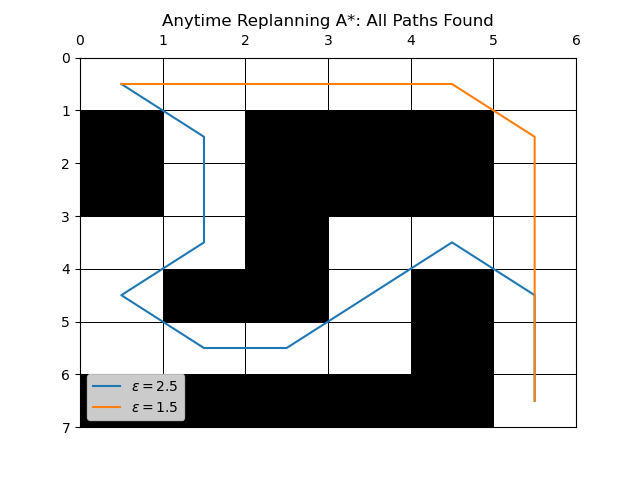

In [60]:
plotter.plot_paths_found(planner.paths_found)

Add some notes about how the graphs should look like, explain how widget works

## Applying ARA* to Larger Graphs with Multiple Branches (10 pts)

Now lets try applying our planner to larger regions where there might be many different paths we can take.

In [18]:
EPSILON = 1.5
START = State(24, 4)
GOAL = State(4, 44)

planner = ARAStar_Planner(GRAPH_LARGE, START, GOAL, EPSILON, stepsize=0.2)
plotter = ARAStar_Plotter(GRAPH_LARGE, START, GOAL)
run(planner)

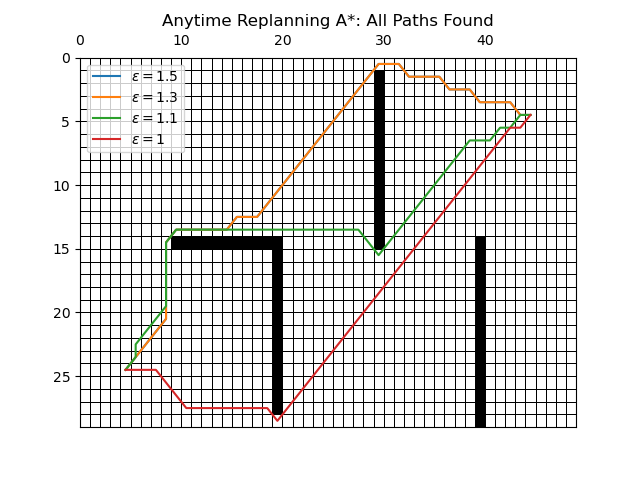

In [19]:
plotter.plot_paths_found(planner.paths_found)

Why does the graph look like this? How does eps changing affect the path?

**Your answer here**